In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df['class'] = (df['class'] == 'g').astype(int)

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


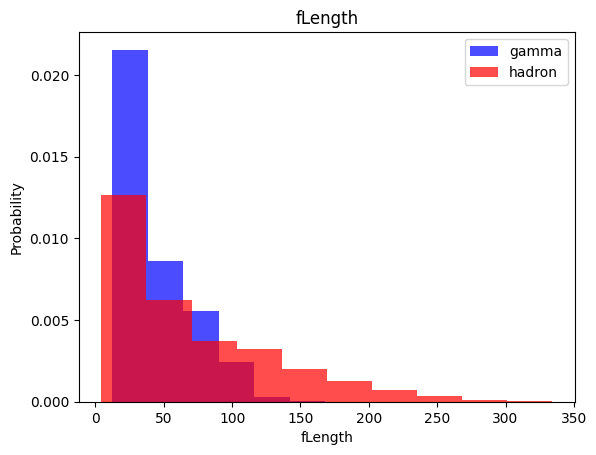

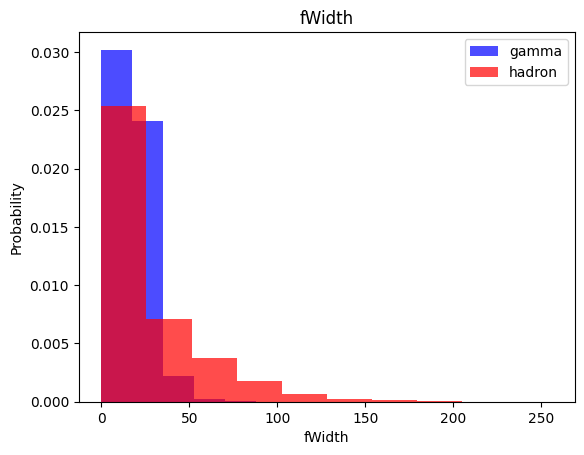

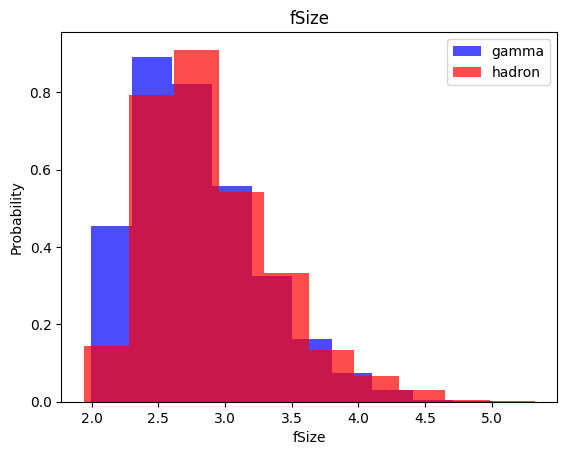

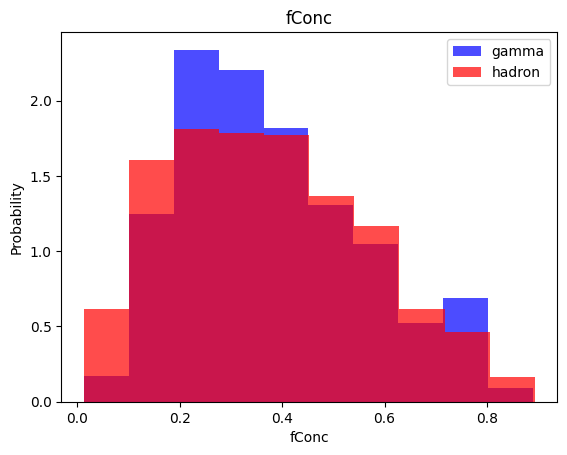

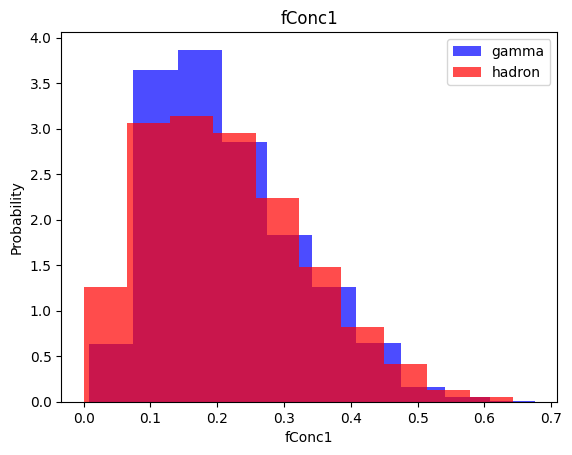

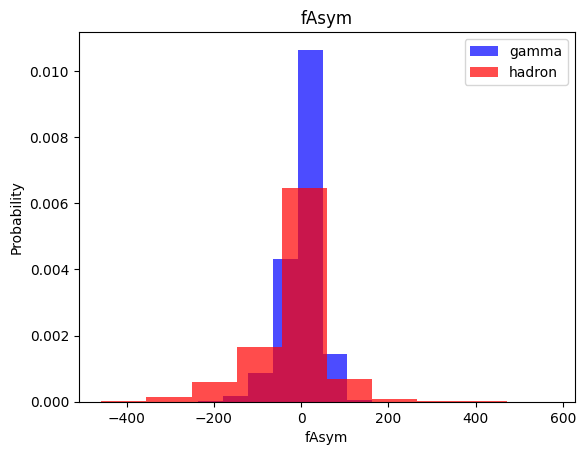

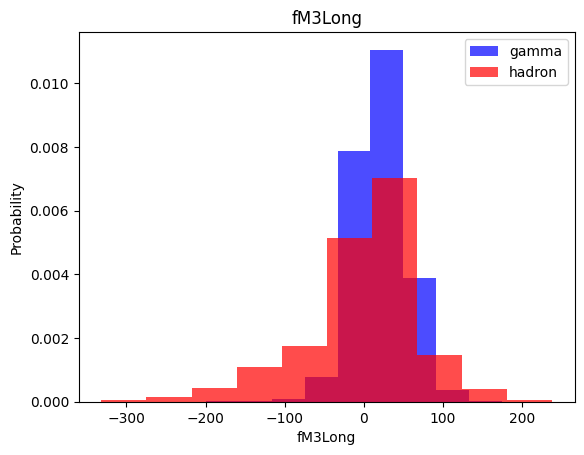

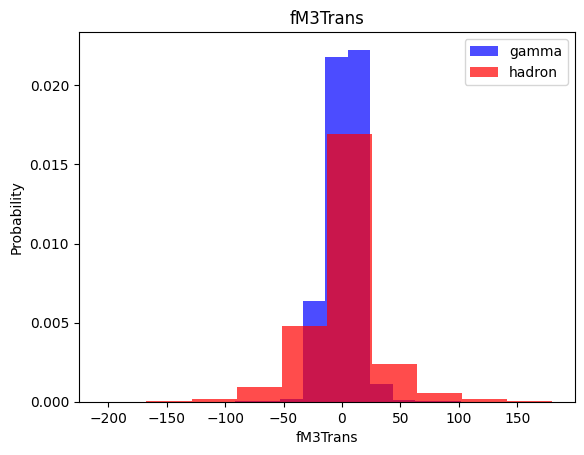

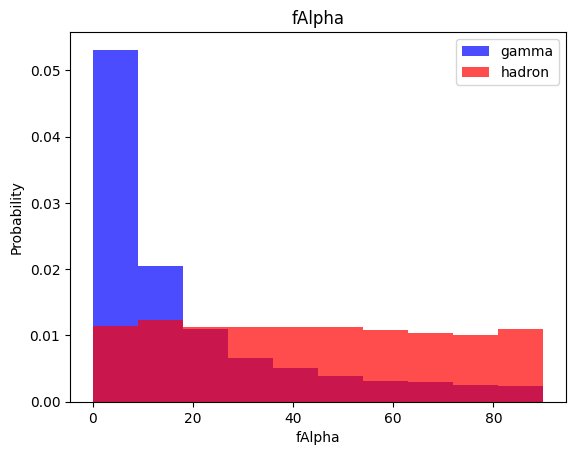

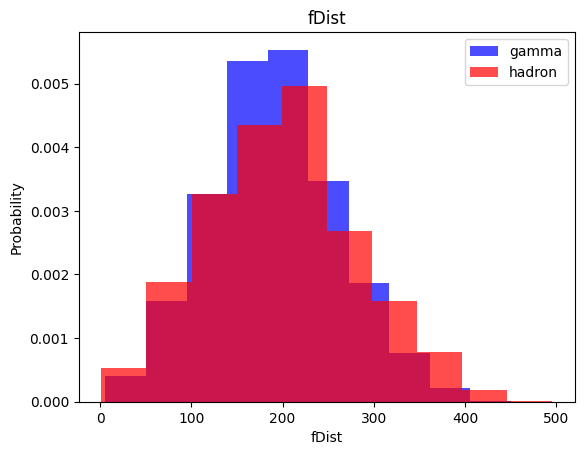

In [5]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Validation, test datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [8]:
print(len(train[train['class'] == 1]))
print(len(train[train['class'] == 0]))

7398
4014


In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

kNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn_model.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1333
           1       0.86      0.85      0.85      2471

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [16]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1333
           1       0.74      0.89      0.81      2471

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [19]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1333
           1       0.84      0.81      0.83      2471

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



Support Vector Machines (SVM)

In [20]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [22]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1333
           1       0.89      0.89      0.89      2471

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [23]:
import tensorflow as tf

In [24]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [25]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(
      optimizer=tf.keras.optimizers.Adam(lr),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  history = nn_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=0,
  )

  return nn_model, history

Training with 16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


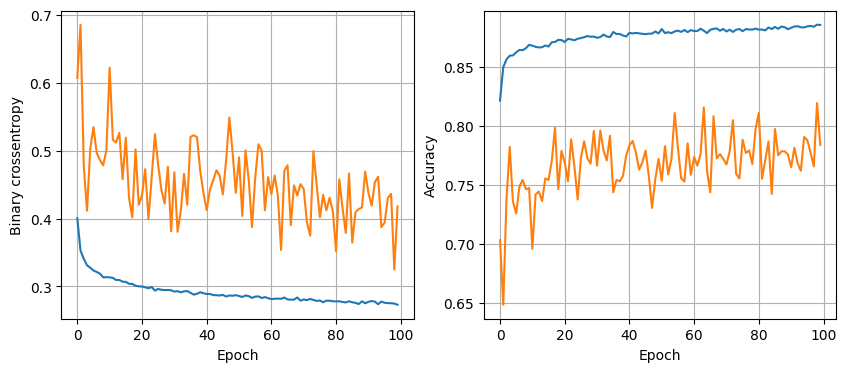

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8755 - loss: 0.3245
Validation loss: 0.32545405626296997, Validation accuracy: 0.8761829733848572
-----------------------------------------------------------------
Training with 16 nodes, dropout 0, lr 0.01, batch size 64


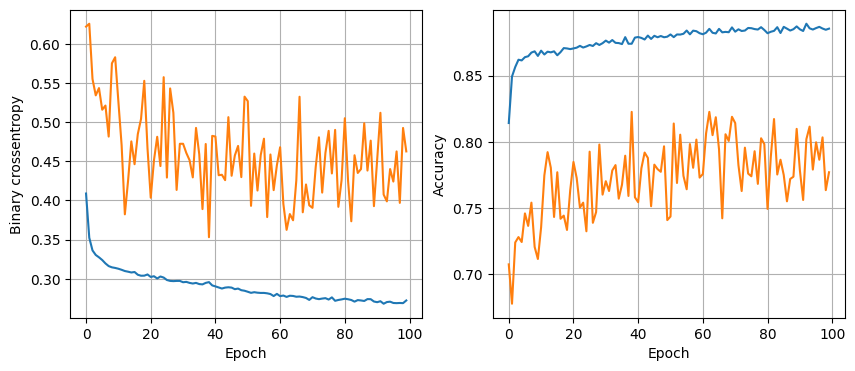

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8851 - loss: 0.2896
Validation loss: 0.30034440755844116, Validation accuracy: 0.8843322992324829
-----------------------------------------------------------------
Training with 16 nodes, dropout 0, lr 0.01, batch size 128


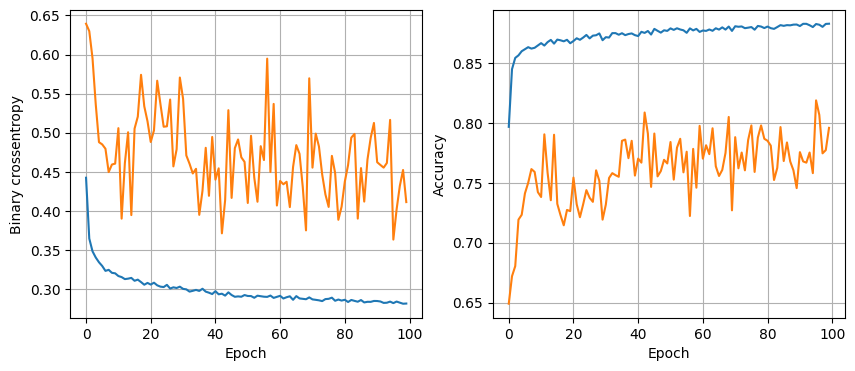

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8813 - loss: 0.2894
Validation loss: 0.30251413583755493, Validation accuracy: 0.8756572008132935
-----------------------------------------------------------------
Training with 16 nodes, dropout 0, lr 0.005, batch size 32


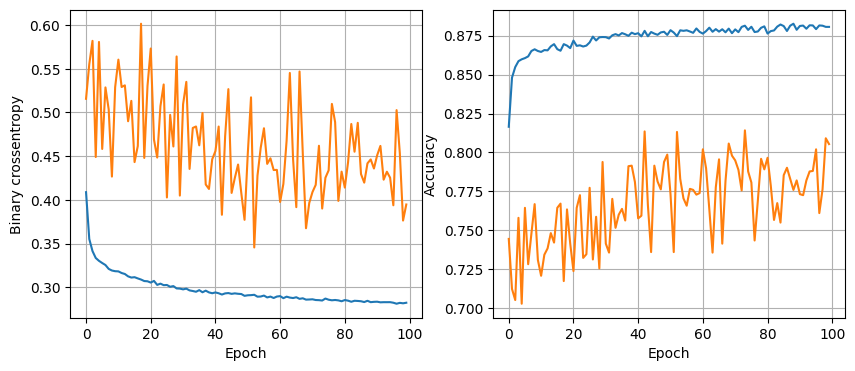

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8685 - loss: 0.3072
Validation loss: 0.3139822781085968, Validation accuracy: 0.8698738217353821
-----------------------------------------------------------------
Training with 16 nodes, dropout 0, lr 0.005, batch size 64


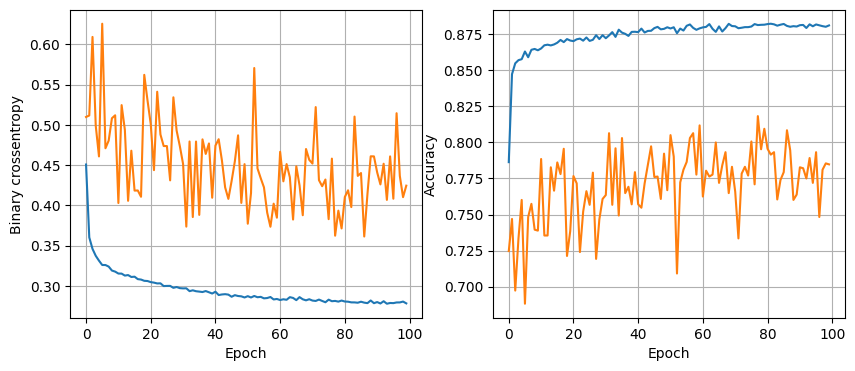

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8736 - loss: 0.3068
Validation loss: 0.31030455231666565, Validation accuracy: 0.8730283975601196
-----------------------------------------------------------------
Training with 16 nodes, dropout 0, lr 0.005, batch size 128


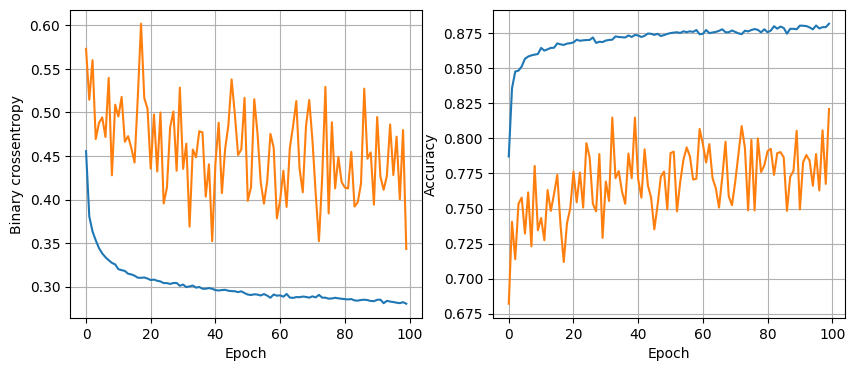

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.3164
Validation loss: 0.31603872776031494, Validation accuracy: 0.8714510798454285
-----------------------------------------------------------------
Training with 16 nodes, dropout 0, lr 0.001, batch size 32


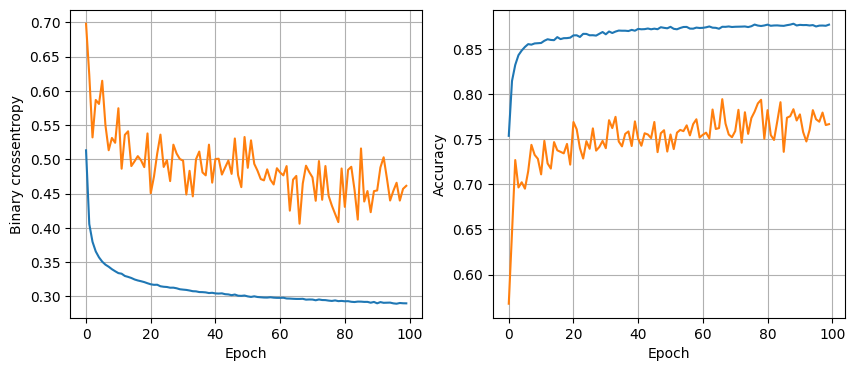

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 0.2919
Validation loss: 0.2978639304637909, Validation accuracy: 0.874605655670166
-----------------------------------------------------------------
Training with 16 nodes, dropout 0, lr 0.001, batch size 64


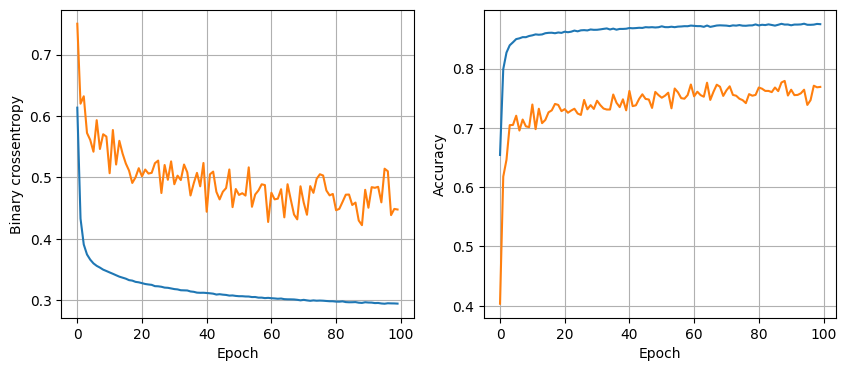

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8688 - loss: 0.3057
Validation loss: 0.3076856732368469, Validation accuracy: 0.8727654814720154
-----------------------------------------------------------------
Training with 16 nodes, dropout 0, lr 0.001, batch size 128


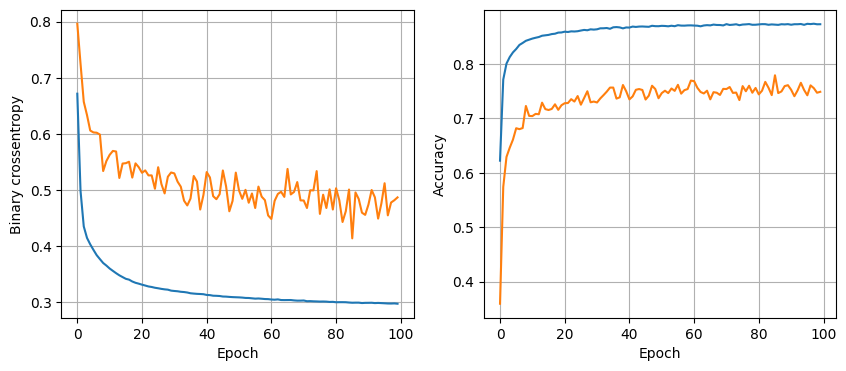

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8780 - loss: 0.2935
Validation loss: 0.3004903495311737, Validation accuracy: 0.8782860040664673
-----------------------------------------------------------------
Training with 16 nodes, dropout 0.2, lr 0.01, batch size 32


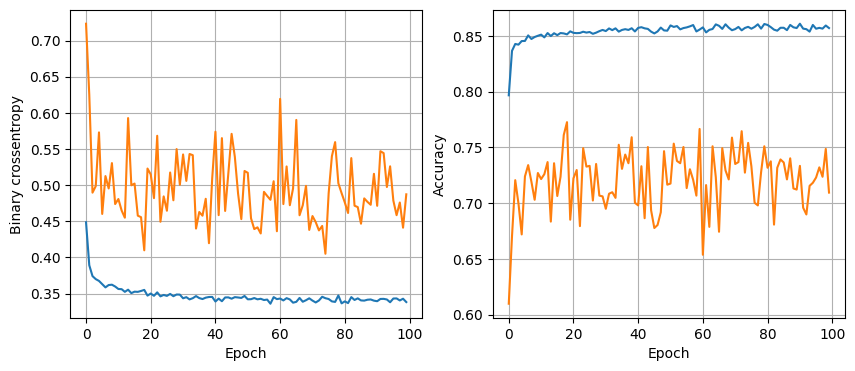

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.3111
Validation loss: 0.3148549497127533, Validation accuracy: 0.8727654814720154
-----------------------------------------------------------------
Training with 16 nodes, dropout 0.2, lr 0.01, batch size 64


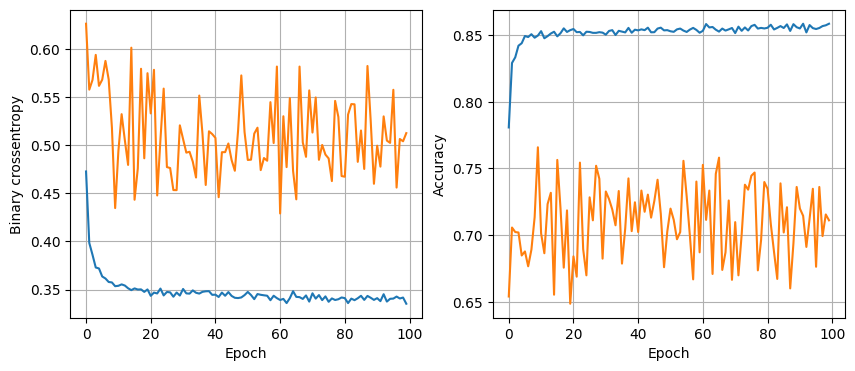

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.3050
Validation loss: 0.3072062134742737, Validation accuracy: 0.8732912540435791
-----------------------------------------------------------------
Training with 16 nodes, dropout 0.2, lr 0.01, batch size 128


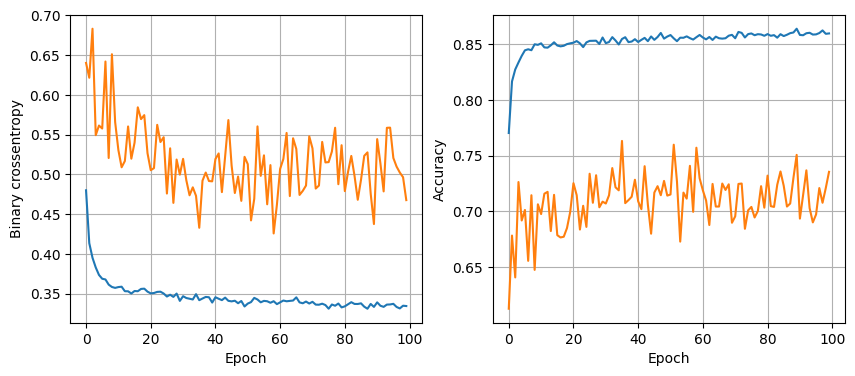

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8713 - loss: 0.3064
Validation loss: 0.3058289587497711, Validation accuracy: 0.8727654814720154
-----------------------------------------------------------------
Training with 16 nodes, dropout 0.2, lr 0.005, batch size 32


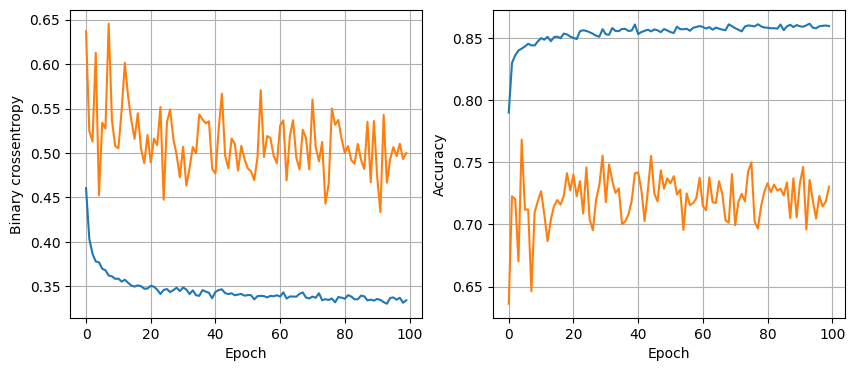

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3055
Validation loss: 0.30703479051589966, Validation accuracy: 0.8717139959335327
-----------------------------------------------------------------
Training with 16 nodes, dropout 0.2, lr 0.005, batch size 64


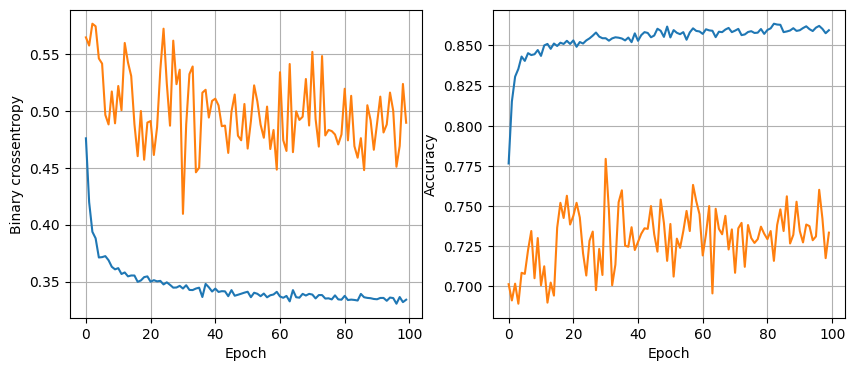

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8735 - loss: 0.3020
Validation loss: 0.3016967177391052, Validation accuracy: 0.8769716024398804
-----------------------------------------------------------------
Training with 16 nodes, dropout 0.2, lr 0.005, batch size 128


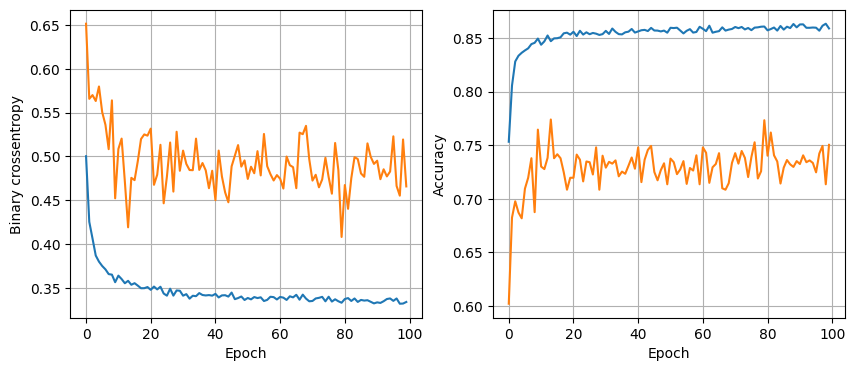

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.2986
Validation loss: 0.30146491527557373, Validation accuracy: 0.874605655670166
-----------------------------------------------------------------
Training with 16 nodes, dropout 0.2, lr 0.001, batch size 32


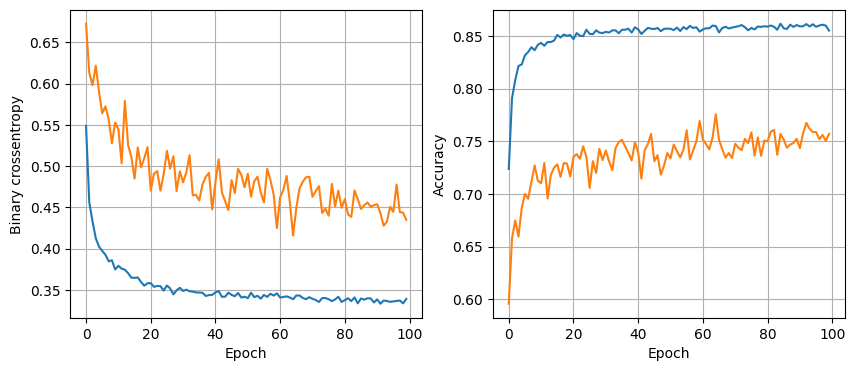

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8721 - loss: 0.3085
Validation loss: 0.3103977143764496, Validation accuracy: 0.8732912540435791
-----------------------------------------------------------------
Training with 16 nodes, dropout 0.2, lr 0.001, batch size 64


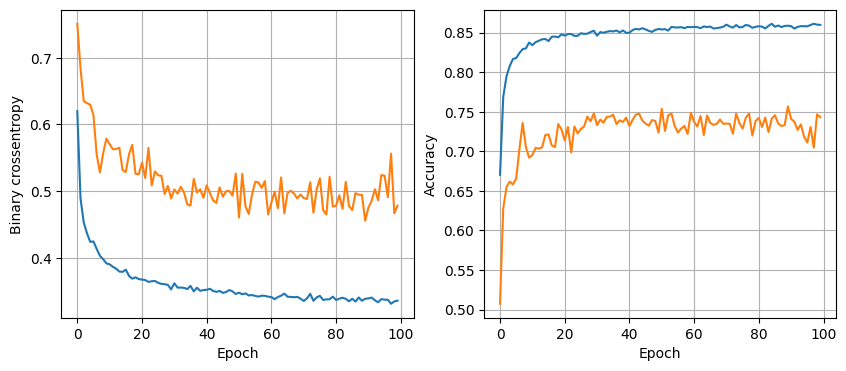

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8779 - loss: 0.3004
Validation loss: 0.3030523657798767, Validation accuracy: 0.8759200572967529
-----------------------------------------------------------------
Training with 16 nodes, dropout 0.2, lr 0.001, batch size 128


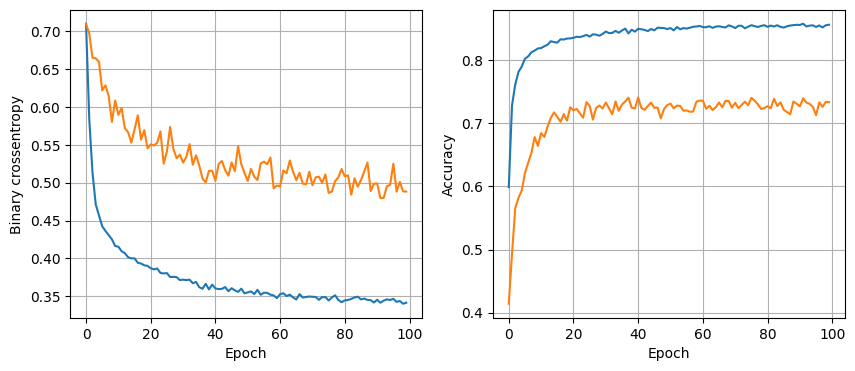

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8711 - loss: 0.3107
Validation loss: 0.30990755558013916, Validation accuracy: 0.8719768524169922
-----------------------------------------------------------------
Training with 32 nodes, dropout 0, lr 0.01, batch size 32


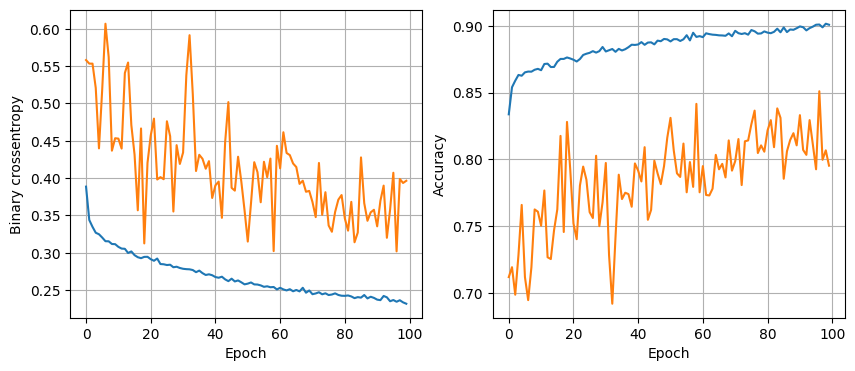

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3352
Validation loss: 0.37096157670021057, Validation accuracy: 0.867770791053772
-----------------------------------------------------------------
Training with 32 nodes, dropout 0, lr 0.01, batch size 64


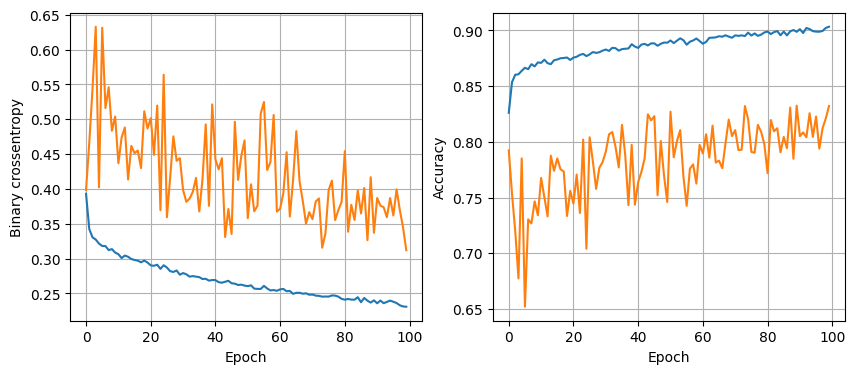

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.3785
Validation loss: 0.3883921802043915, Validation accuracy: 0.8648790717124939
-----------------------------------------------------------------
Training with 32 nodes, dropout 0, lr 0.01, batch size 128


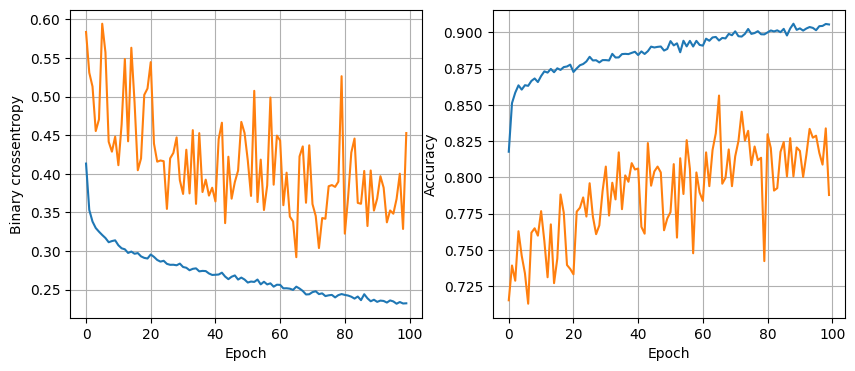

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8638 - loss: 0.3540
Validation loss: 0.366118460893631, Validation accuracy: 0.8606729507446289
-----------------------------------------------------------------
Training with 32 nodes, dropout 0, lr 0.005, batch size 32


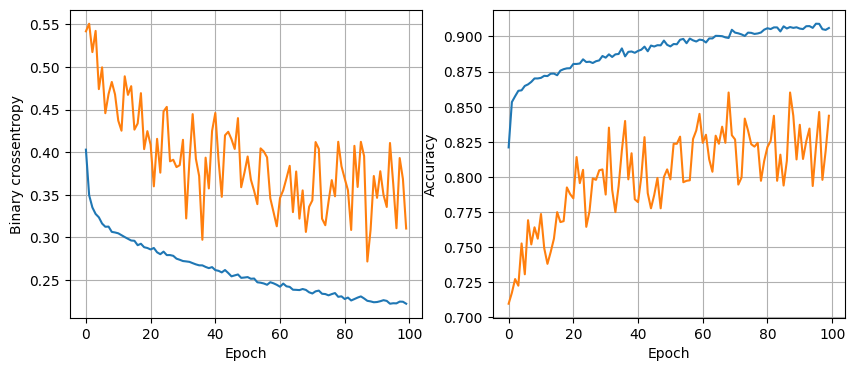

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8775 - loss: 0.3485
Validation loss: 0.36359554529190063, Validation accuracy: 0.8714510798454285
-----------------------------------------------------------------
Training with 32 nodes, dropout 0, lr 0.005, batch size 64


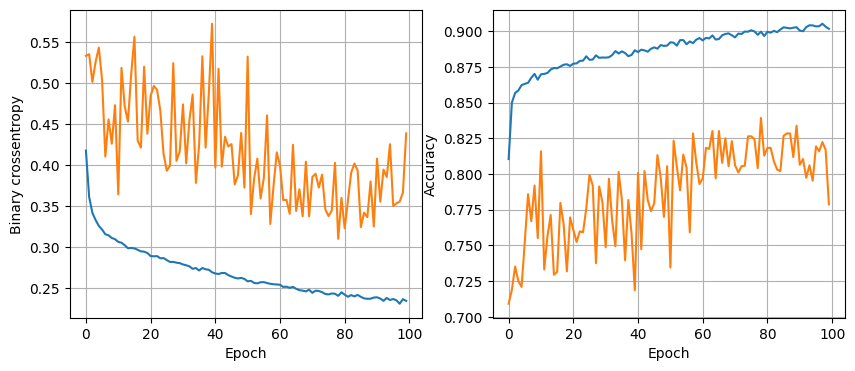

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8712 - loss: 0.3387
Validation loss: 0.34548434615135193, Validation accuracy: 0.8717139959335327
-----------------------------------------------------------------
Training with 32 nodes, dropout 0, lr 0.005, batch size 128


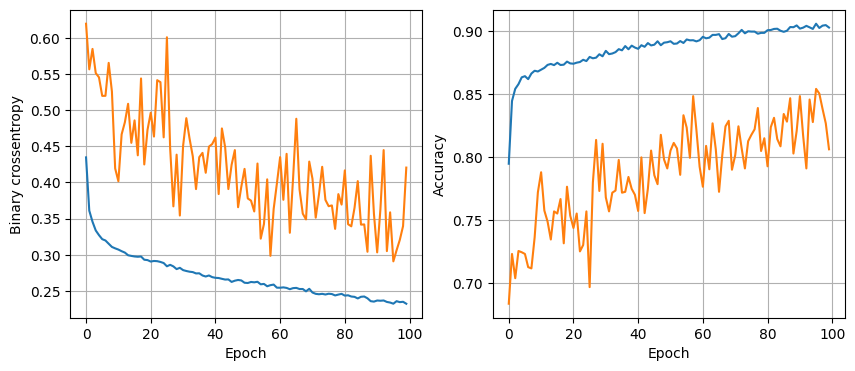

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - loss: 0.3143
Validation loss: 0.3200931251049042, Validation accuracy: 0.8777602314949036
-----------------------------------------------------------------
Training with 32 nodes, dropout 0, lr 0.001, batch size 32


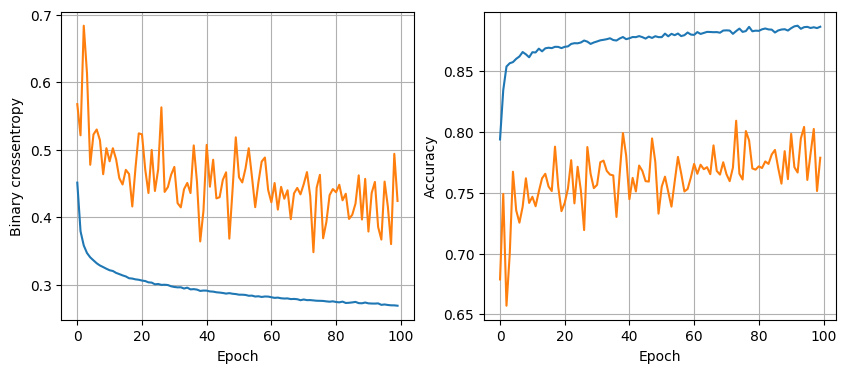

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8769 - loss: 0.3015
Validation loss: 0.31006789207458496, Validation accuracy: 0.8740799427032471
-----------------------------------------------------------------
Training with 32 nodes, dropout 0, lr 0.001, batch size 64


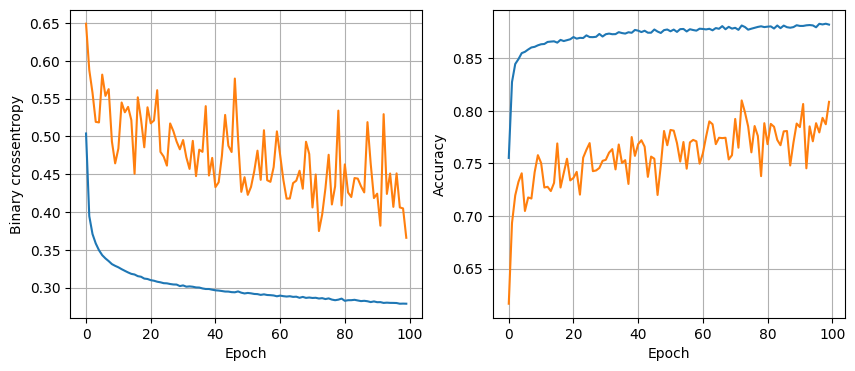

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8781 - loss: 0.3030
Validation loss: 0.3108353316783905, Validation accuracy: 0.8748685717582703
-----------------------------------------------------------------
Training with 32 nodes, dropout 0, lr 0.001, batch size 128


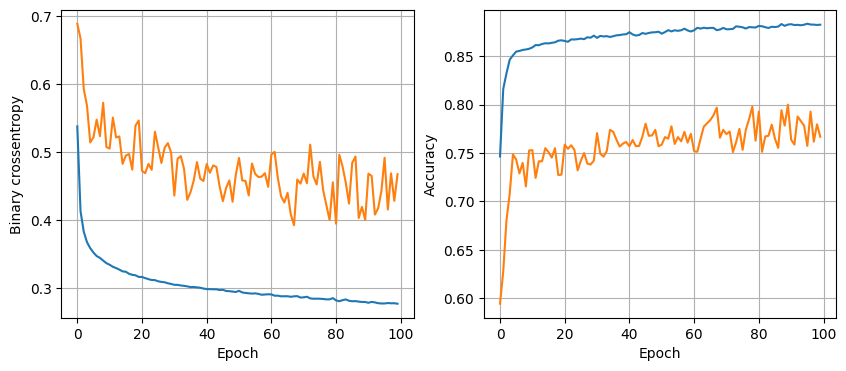

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8796 - loss: 0.2924
Validation loss: 0.30240875482559204, Validation accuracy: 0.8764458298683167
-----------------------------------------------------------------
Training with 32 nodes, dropout 0.2, lr 0.01, batch size 32


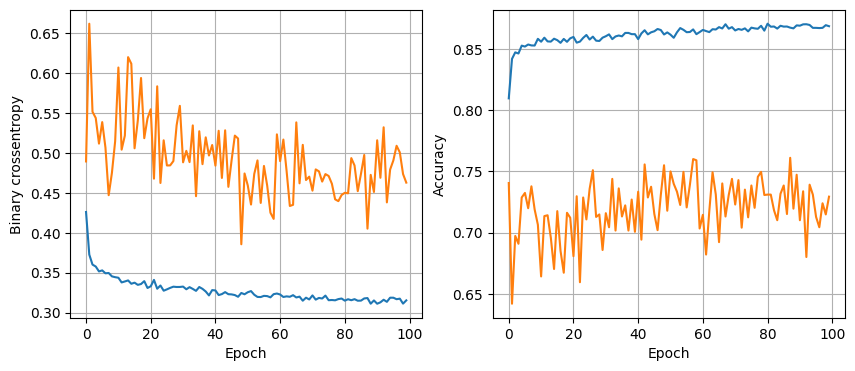

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8778 - loss: 0.2909
Validation loss: 0.29188817739486694, Validation accuracy: 0.8793375492095947
-----------------------------------------------------------------
Training with 32 nodes, dropout 0.2, lr 0.01, batch size 64


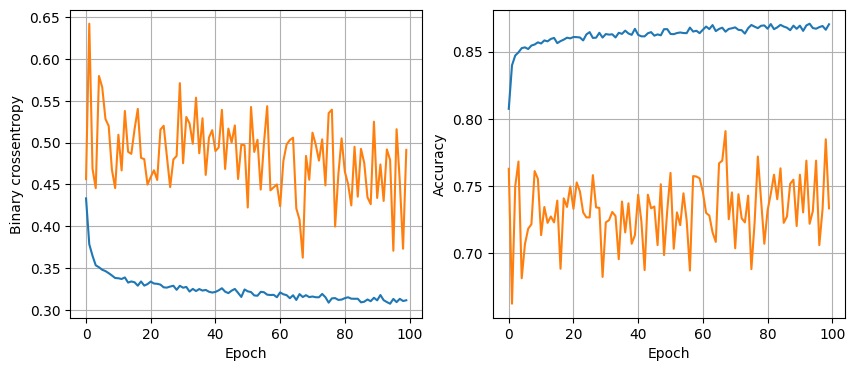

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.2911
Validation loss: 0.2954278886318207, Validation accuracy: 0.8764458298683167
-----------------------------------------------------------------
Training with 32 nodes, dropout 0.2, lr 0.01, batch size 128


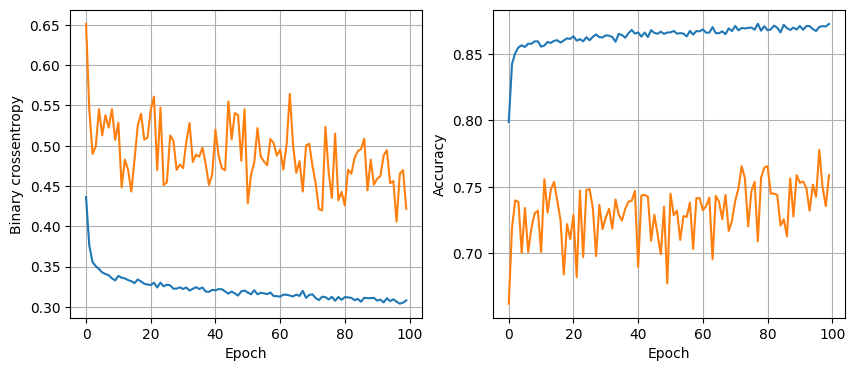

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - loss: 0.2951
Validation loss: 0.29698294401168823, Validation accuracy: 0.8790746331214905
-----------------------------------------------------------------
Training with 32 nodes, dropout 0.2, lr 0.005, batch size 32


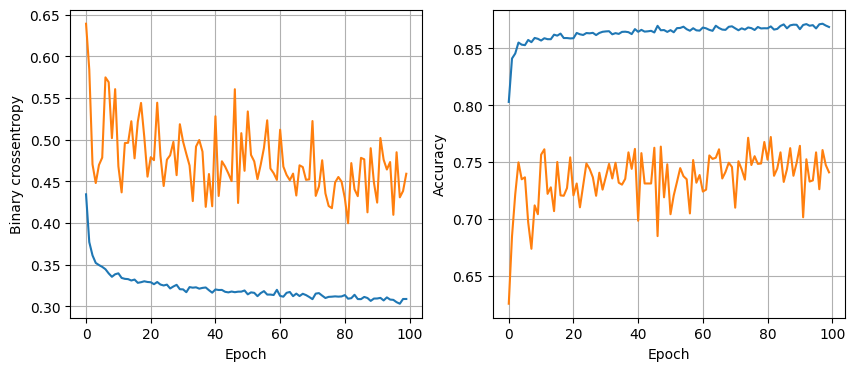

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.2896
Validation loss: 0.29397258162498474, Validation accuracy: 0.8793375492095947
-----------------------------------------------------------------
Training with 32 nodes, dropout 0.2, lr 0.005, batch size 64


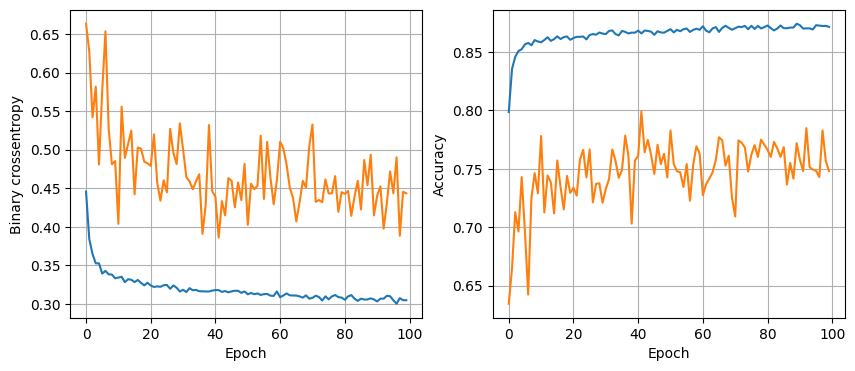

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8804 - loss: 0.2926
Validation loss: 0.2965123653411865, Validation accuracy: 0.8806519508361816
-----------------------------------------------------------------
Training with 32 nodes, dropout 0.2, lr 0.005, batch size 128


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f'Training with {num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss, val_acc = model.evaluate(X_valid, y_valid)
        print(f'Validation loss: {val_loss}, Validation accuracy: {val_acc}')
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model
        print('-----------------------------------------------------------------')

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))